# Colorization
Class project - CS231N - Stanford University

Vincent Billaut  
Matthieu de Rochemonteix  
Marc Thibault  

See our GitHub [repo](https://github.com/vincentbillaut/all-colors-matter) for more details on the implementation.

## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from scipy.ndimage import imread

####################################################
# Setting working directory to enable relative paths
import os
os.chdir("../")
####################################################

from models.coloringmodel import Config
from models.naive_convnet import NaiveConvColoringModel
from utils.dataset import Dataset
from utils.color_utils import RGB_to_YUV, YUV_to_RGB

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Run model

In [ ]:
# load config, dataset and instantiate model
config = Config("configs/config.json")
dataset = Dataset(config.train_path, config.val_path)
model = NaiveConvColoringModel(config, dataset=dataset)

In [ ]:
from pprint import pprint
pprint(config.__dict__)

In [ ]:
# enable gpu
conf = tf.ConfigProto()
conf.gpu_options.allow_growth = True

In [ ]:
# run model
with tf.Session(config=conf) as sess:
    sess.run(tf.global_variables_initializer())
    model.train_model(sess)

## Visualizing results

In [49]:
# epochs to visualize for a given picture
epochs_list = [1,2,3,4,5]#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]

# images to visualize
images_list = ["outputs/0000382"]

In [50]:
def visualize_pred(nlist, imlist):
    """
    Visualize input/prediction/output triplets at different epochs, for
    several images at once.
    Will plot one three-picture row per epoch per picture.
    
    Parameters:
        - nlist:  list(int)
            list of epochs that we want to plot for each image
        - imlist: list(str)
            list of paths to the images that we want to look at
            Ex: to look at 'outputs/0000382_epoch10_true.png' and the
                others of the same image, only input "outputs/0000382"
    """
    plt.figure(figsize=(16,5*len(nlist)*len(imlist)))
    for j,im in enumerate(imlist):
        for i,n in enumerate(nlist):
            image_name_epoch = im + "_epoch{}".format(n)
            image_true = imread(image_name_epoch+"_true.png").astype(np.dtype("float32"))
            image_pred = imread(image_name_epoch+"_pred.png").astype(np.dtype("float32"))

            # grayscale
            ax = plt.subplot(len(nlist) * len(imlist), 3, 1 + 3 * i + 3 * len(nlist) * j)
            plt.imshow(np.repeat(image_true.mean(axis=2).reshape(image_true.shape[0],image_true.shape[1],1),3,axis=2) / 255)
            plt.axis('off')
            ax.set_title("input")

            # pred
            ax = plt.subplot(len(nlist) * len(imlist), 3, 2 + 3 * i + 3 * len(nlist) * j)
            plt.imshow(image_pred / 255)
            plt.axis('off')
            ax.set_title("prediction (n = {})".format(n))

            # true
            ax = plt.subplot(len(nlist) * len(imlist), 3, 3 + 3 * i + 3 * len(nlist) * j)
            plt.imshow(image_true / 255)
            plt.axis('off')
            ax.set_title("ground truth")

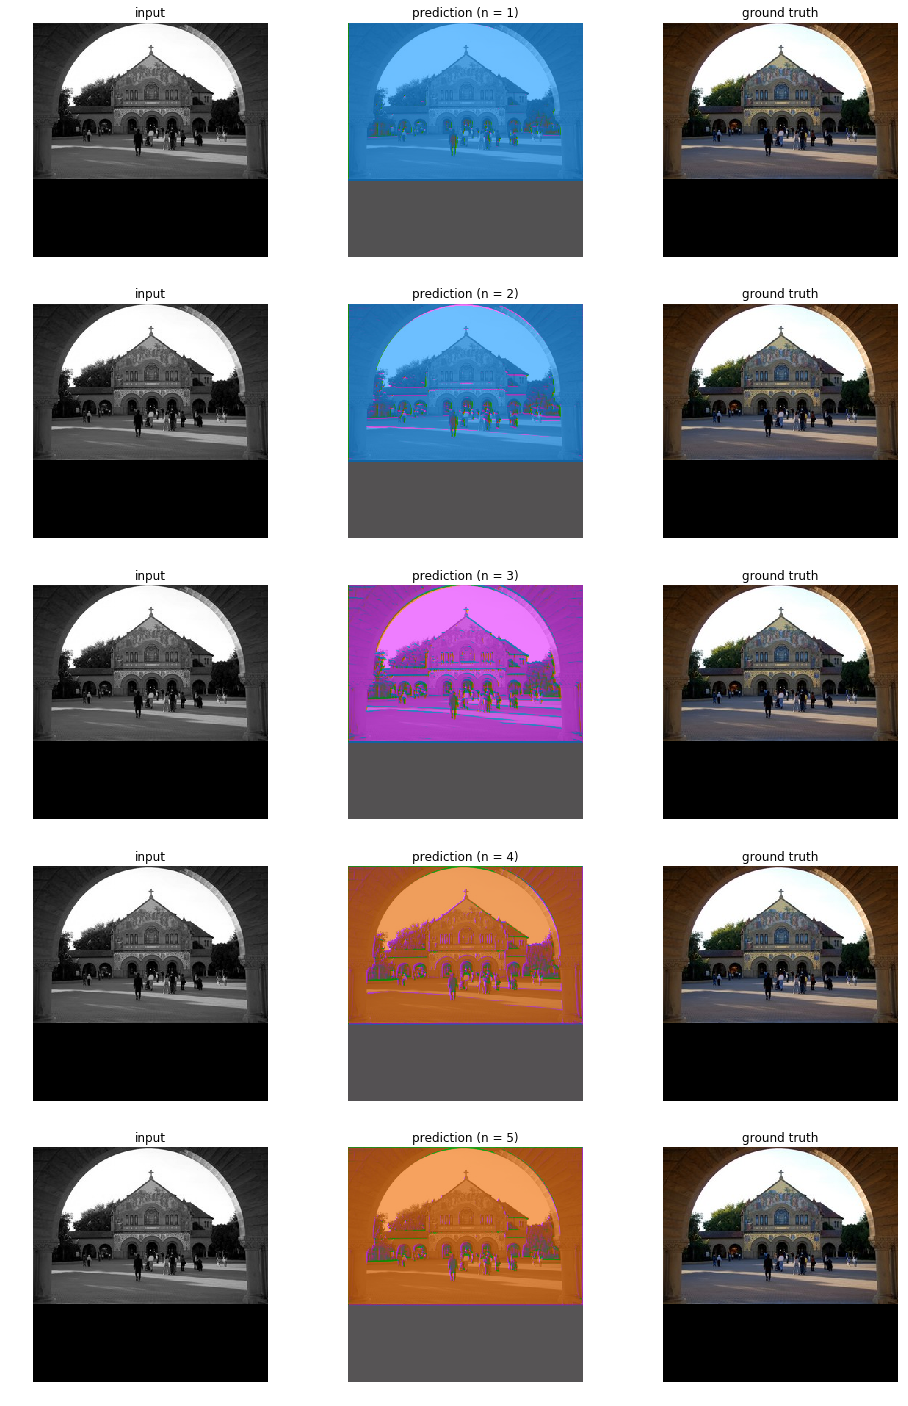

In [51]:
visualize_pred(epochs_list, images_list)